In [4]:
!pip install -q scikit-learn matplotlib numpy

# Digits Classification Mini Project

In this notebook, we will work with the **Digits dataset** from `sklearn.datasets`.  
This dataset contains 8×8 images of handwritten digits (0–9).

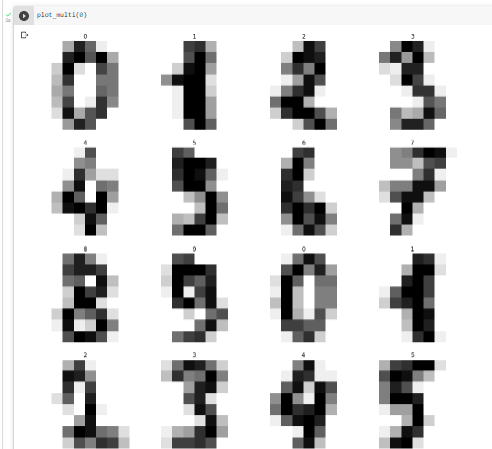

### What we will do:
1. Load the dataset and explore basic information  
2. View sample digit images  
3. Split data into train/test sets  
4. Train a simple classifier (KNN)  
5. Evaluate accuracy and print some predictions  

Let's begin by loading the dataset.


In [5]:
from sklearn.datasets import load_digits

# Load the Digits dataset
digits = load_digits()

# Basic info
print("Data shape:", digits.data.shape)
print("Target shape:", digits.target.shape)
print("Classes:", set(digits.target))

Data shape: (1797, 64)
Target shape: (1797,)
Classes: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)}


## Viewing Sample Digit Images

Let's look at a few images from the dataset to understand how the digits are represented.  
Each image is an 8×8 grayscale pixel grid showing a handwritten digit.

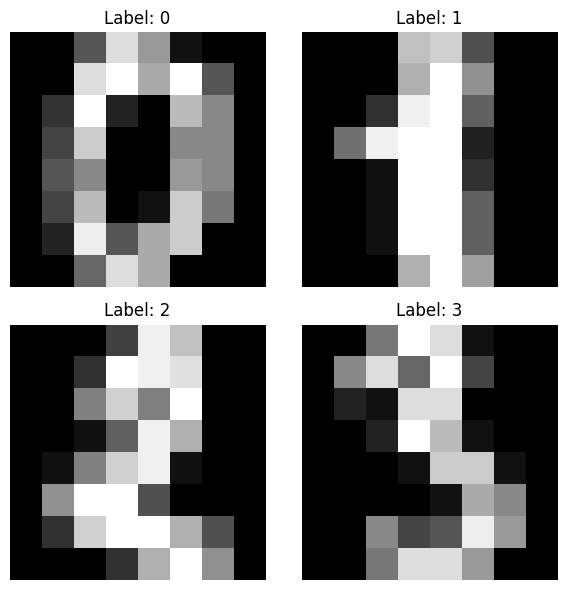

In [6]:
import matplotlib.pyplot as plt

# Display the first 4 digit images
plt.figure(figsize=(6, 6))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Splitting the Data into Train and Test Sets

We will split the dataset into:
- **80% training data**
- **20% testing data**

This helps us evaluate how well the model performs on unseen data.


In [8]:
from sklearn.model_selection import train_test_split

X = digits.data        # flattened images (64 features)
y = digits.target      # digit labels (0–9)

# Split dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1437, 64)
Testing set shape: (360, 64)


## Training a Simple Classifier (KNN)

To build our first machine learning model, we will use the **K-Nearest Neighbors (KNN)** algorithm.

### What is KNN?
KNN is one of the simplest classification algorithms.  
Instead of "learning" complex mathematical rules, it classifies a new sample by looking at the **K closest examples** from the training data.

In other words:
- Every digit image is represented as 64 features (8×8 pixels flattened)
- When a new digit appears, KNN checks which existing images look most similar
- The model assigns the label that is most common among those neighbors

### Why are we using KNN here?
- Very easy to understand  
- Works well on **small datasets** like Digits  
- No training time in the traditional sense (just stores the data)  
- Good for demonstrating the basic ML workflow before moving to advanced models

### What the model will do
- We choose a value for **K** (here, K = 3)
- KNN finds the 3 nearest training samples for each test sample
- It predicts the digit based on majority vote
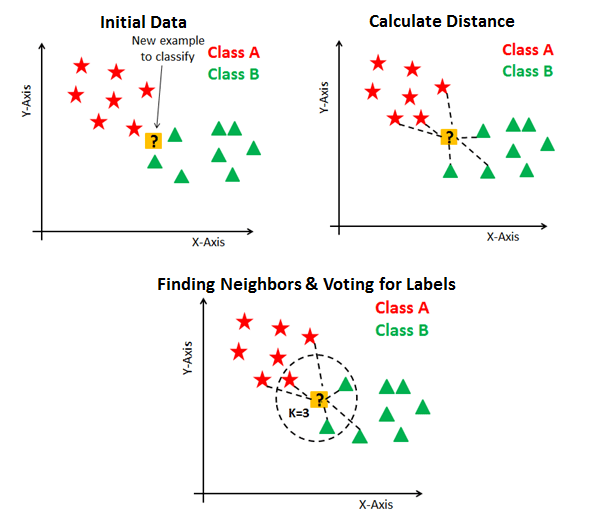

Now let's train the model using our training data.


In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Create the model
model = KNeighborsClassifier(n_neighbors=3)

# Train (fit) the model on the training data
model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


## Evaluating the Model and Showing Predictions

Now we will:
- Check the **accuracy** of our KNN classifier on the test set  
- Print a few **predictions** and compare them with actual labels

In [ ]:
from sklearn.metrics import accuracy_score

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Show first 5 predictions vs actual labels
print("\nSample Predictions:")
for i in range(5):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")

Model Accuracy: 0.98

Sample Predictions:
Predicted: 6, Actual: 6
Predicted: 9, Actual: 9
Predicted: 3, Actual: 3
Predicted: 7, Actual: 7
Predicted: 2, Actual: 2


## Visualizing Predictions and Confusion Matrix

To better understand how our model performs, we will:

1. Display a few test images along with their predicted labels  
2. Show a **confusion matrix**, which helps us see where the model is making mistakes  


Sample Predictions:



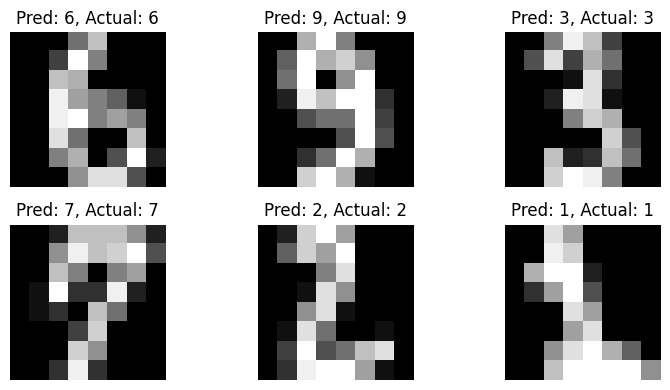

Confusion Matrix



<Figure size 600x600 with 0 Axes>

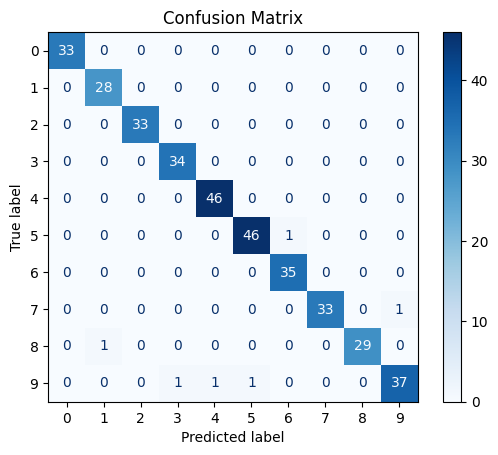

Accuracy score:  0.9833333333333333


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score

# --- Show sample predicted images ---
print("Sample Predictions:\n")
plt.figure(figsize=(8, 4))

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}, Actual: {y_test[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

print("Confusion Matrix\n")

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy score: ", accuracy_score(y_test, y_pred))
